#Imports

In [1]:
import numpy as np
from tensorflow import keras
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
import matplotlib.pyplot as plt
import pickle

#Data

In [2]:
num_classes = 10 # 0 1 2 3 4 5 6 7 8 9
input_shape = (28, 28, 1) #width 28, height 28

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Plot

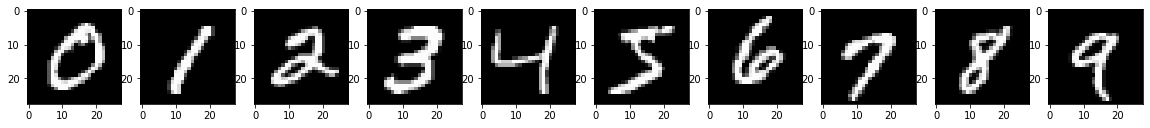

In [5]:
fig, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')

#Prepare Data

In [6]:
print(y_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [7]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
print(y_train[0:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [9]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [10]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [11]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


#Model

In [12]:
model = keras.Sequential(
    [
      Conv2D(75, kernel_size=(3, 3), padding='same', activation="relu", input_shape=input_shape),
      BatchNormalization(),
      MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),

      Conv2D(50, kernel_size=(3, 3), padding ='same', activation="relu"),
      Dropout(0.2),
      BatchNormalization(),
      MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),

      Conv2D(25, kernel_size=(3, 3), padding='same', activation="relu"),
      BatchNormalization(),
      MaxPool2D(pool_size=(2, 2), strides=2, padding='same'),


      Flatten(),
      Dense(256, activation="relu"),
      Dropout(0.3),
     
      Dense(num_classes, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

In [13]:
batch_size = 128
epochs = 15

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.3)

Epoch 1/15
329/329 [==============================] - 10s 13ms/step - loss: 0.2200 - accuracy: 0.9329 - val_loss: 0.9242 - val_accuracy: 0.7005
Epoch 2/15
329/329 [==============================] - 4s 12ms/step - loss: 0.0606 - accuracy: 0.9818 - val_loss: 0.0675 - val_accuracy: 0.9807
Epoch 3/15
329/329 [==============================] - 4s 11ms/step - loss: 0.0432 - accuracy: 0.9864 - val_loss: 0.0399 - val_accuracy: 0.9882
Epoch 4/15
329/329 [==============================] - 4s 12ms/step - loss: 0.0359 - accuracy: 0.9888 - val_loss: 0.0401 - val_accuracy: 0.9877
Epoch 5/15
329/329 [==============================] - 4s 12ms/step - loss: 0.0305 - accuracy: 0.9900 - val_loss: 0.0416 - val_accuracy: 0.9865
Epoch 6/15
329/329 [==============================] - 4s 12ms/step - loss: 0.0250 - accuracy: 0.9915 - val_loss: 0.0355 - val_accuracy: 0.9900
Epoch 7/15
329/329 [==============================] - 4s 12ms/step - loss: 0.0218 - accuracy: 0.9926 - val_loss: 0.0323 - val_accuracy: 0.990

#Evaluate

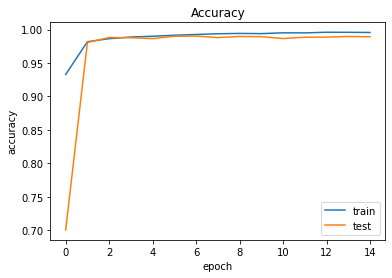

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

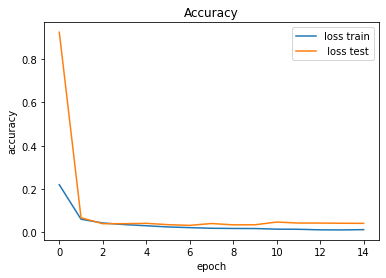

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['loss train',' loss test'])

plt.show()

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03457340598106384
Test accuracy: 0.9907000064849854


#Metrics

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [38]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
predict = model.predict(x_test)

In [48]:
predict

array([[3.95250430e-11, 5.21696020e-10, 3.60365604e-09, ...,
        9.99999642e-01, 4.57176602e-10, 3.58448915e-07],
       [1.10370803e-10, 1.85491428e-10, 1.00000000e+00, ...,
        6.63810505e-14, 1.64825683e-14, 1.26306281e-15],
       [2.59986277e-09, 9.99999881e-01, 3.34463013e-10, ...,
        4.24599955e-09, 9.52142365e-10, 1.52903506e-11],
       ...,
       [2.07369389e-16, 5.29835377e-12, 3.09737105e-16, ...,
        1.83596150e-12, 3.82483802e-12, 1.51738289e-10],
       [1.02673304e-16, 1.17628048e-15, 5.14107259e-20, ...,
        1.05196080e-14, 4.39980807e-09, 2.88817703e-14],
       [6.60136976e-08, 6.89859836e-11, 1.09182746e-10, ...,
        7.66610993e-12, 3.79665082e-08, 3.56834666e-11]], dtype=float32)

In [36]:
predict_classes = np.argmax(predict, axis=1)

In [37]:
predict_classes

array([7, 2, 1, ..., 4, 5, 6])

##Accuracy

In [49]:
print(accuracy_score(np.argmax(y_test, axis=1), predict_classes))

0.9907


##Confusion Matrix

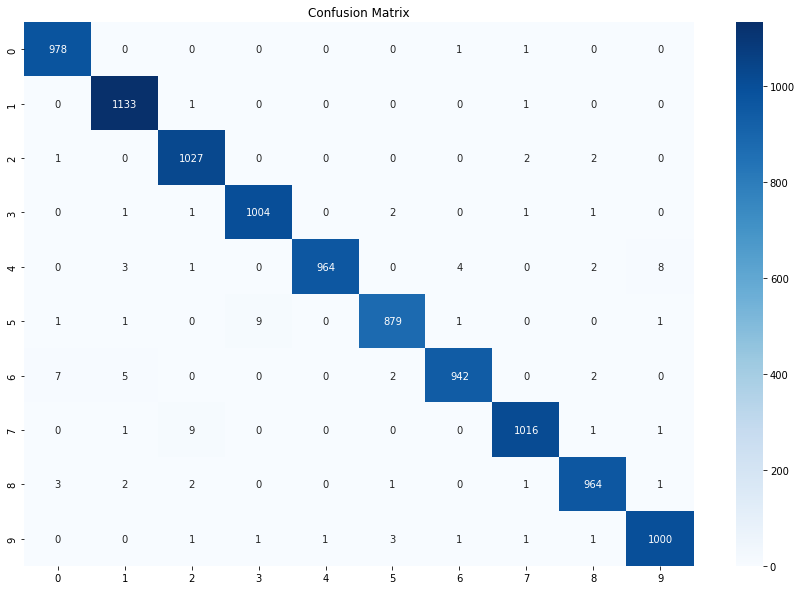

In [58]:
# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), predict_classes), annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_title('Confusion Matrix');

In [17]:
pickle.dump(model, open('/content/drive/MyDrive/Artificial Intelligence/MNIST/model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://1580b9b3-89cb-4357-baca-e68ae516c389/assets
